# Least squares regressions

Finnish university students are encouraged to use the CSC Notebooks platform.<br/>
<a href="https://notebooks.csc.fi"><img alt="CSC badge" src="https://img.shields.io/badge/launch-CSC%20notebook-blue.svg" style="vertical-align:text-bottom"></a>

Others can follow the lesson and fill in their student notebooks using Binder.<br/>
<a href="https://mybinder.org/v2/gh/introqg/notebooks/master?urlpath=lab/tree/L2/least-squares.ipynb"><img alt="Binder badge" src="https://img.shields.io/badge/launch-binder-red.svg" style="vertical-align:text-bottom"></a>

A *linear regression* or *least squares fit for a line* is a common way of fitting a line to a set of point data for two variables, such as on an *x*-*y* graph. In essence, we assume the two values are *linearly* related to one another and find the line that fits the data best. Once done, this provides a means to estimate values from the line where no data may exist in the scatter plot dataset. Not all data should be expected to be fit well by a line, but linear regressions are a powerful method for determining cases when two variables are directly related to one another. A common example might be the temperature at which magma erupts versus the SiO<sub>2</sub> content of the magma, as shown below in Figure 2.1.

![Magma temperatures](img/magma-temps.png)

_**Figure 2.1**. Eruption temperatures of magmas as a function of their SiO<sub>2</sub> content with a linear regression line. Source: Figure 16.1 from [McKillup and Dyar, 2010](http://www.cambridge.org/fi/academic/subjects/earth-and-environmental-science/earth-science-general-interest/geostatistics-explained-introductory-guide-earth-scientists?format=HB&isbn=9780521763226)._

## The equation of a line

In order to perform a linear regression, we need to find the equation of the best-fit line, such the one that might relate temperature and SiO<sub>2</sub> content in the example above. To do this, we first need to recall the equation for a line:

$$
\large
y = A + B x
$$
where $x$ and $y$ are the coordinates of the data points, $A$ is the $y$-intercept, and $B$ is the slope of the line.

Thus, in order to calculate a "best fit" line to some data our task is to determine the values of the constants $A$ and $B$. Consider the example below in which $A$ and $B$ are known. If we make the rather common assumption that the uncertainties for the values on the $x$ axis are negligible compared to the uncertainties along the $y$ axis, we can say:

$$
\large
(\mathrm{true~value~of~}y_{i}) = A + B x_{i}
$$

Thus, it is possible to find the value of $y$ for two linearly related values when $A$ and $B$ are known.

## Finding the coefficients $A$ and $B$

Finding the values of $A$ and $B$ then for the case of a linear regression to some $x$-$y$ data is fairly straightforward, though it does involve a bit of algebra. For our purposes, I'll refer you to Chapter 8 of [Taylor, 1997](http://www.uscibooks.com/taylornb.htm) for a complete explanation of how to find $A$ and $B$, and simply present the relevant equations below.

The value of the $y$-intercept can be found using

$$
\large
A = \frac{\sum{x^{2}} \sum{y} - \sum{x} \sum{xy}}{\Delta}
$$

where $x$ is the $i$th data point plotted on the $x$-axis, $y$ is the $i$th data point plotted on the $y$-axis, and $\Delta$ is defined below.

The line slope can be found using

$$
\large
B = \frac{N \sum{xy} - \sum{x} \sum {y}}{\Delta}
$$

where $N$ is the number of values in the regression.

And the value of $\Delta$ is

$$
\large
\Delta = N \sum{x^{2}} - \left( \sum{x} \right)^{2}
$$

With the equations above, you are now able to calculate an *unweighted* linear regression, the best-fit lines to some $x$-$y$ data in which the uncertainties in the measurements are not considered to influence the fit of the line. It is also possible to fit regression lines that consider the variable uncertainties in the data, referred to as *weighted regressions*, but will will not consider that type of regression at this stage.

## In-class demonstration space

The cell below can be used for following live demonstrations during the class lesson.

In [1]:
# Coding done during class time goes below
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Height (cm)
x = [182, 193, 178, 173, 183, 164, 176, 163, 164, 162]
# Shoe size
y = [43, 46, 43, 41, 45, 37, 43, 39, 39, 38]

# Convert to arrays
x = np.array(x)
y = np.array(y)

In [30]:
n = len(x)
delta = n * (x**2).sum() - (x.sum()) ** 2
a = (((x**2).sum() * y.sum()) - (x.sum() * (x * y).sum())) / delta
b = ((n * (x * y).sum()) - (x.sum() * y.sum())) / delta

In [31]:
print(f"Value of a: {a}")
print(f"Value of b: {b}")
print(f"Value of delta: {delta}")

Value of a: -7.290641387656313
Value of b: 0.2801532876159742
Value of delta: 9916


In [32]:
r = ((x - x.mean()) * (y - y.mean())).sum() / np.sqrt(
    ((x - x.mean()) ** 2).sum() * ((y - y.mean()) ** 2).sum()
)

In [33]:
print(f"Value of r: {r}")

Value of r: 0.9602686685888652


Text(162, 46, 'Correlation coeff: 0.96')

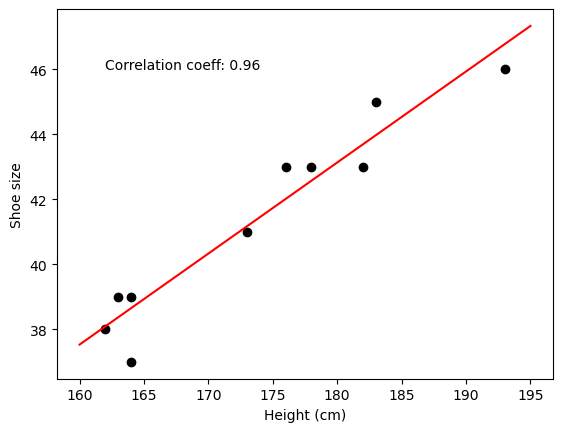

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, "ko")
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Shoe size")
ax.plot([160, 195], [a + b * 160, a + b * 195], "r-")
ax.text(162, 46, f"Correlation coeff: {r:.2f}")